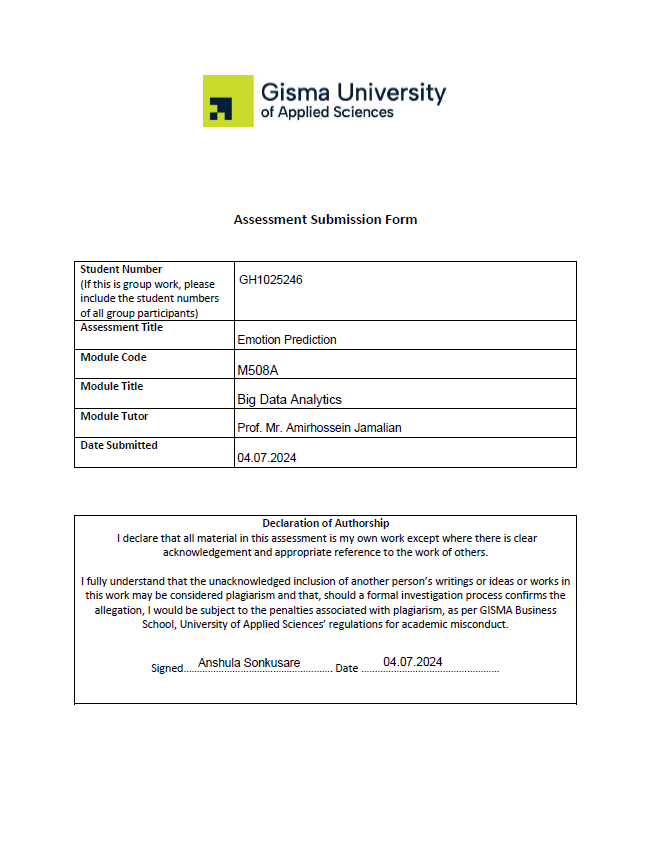

# Emotion Prediction

### Business Problem
The advent of social media, emails and online reviews has helped a lot to drag attention towards business data through customer feedback. It would be great significance to understand emotional nature of such feedback which can help to improve customer satisfaction level, trust and spot problems. Though, this will also increase product or service quality. By predicting emotions from the texts, companies would also able to measure the customer's mood in accurate manner so that they can address negative emotions immediately while at the same time utilizing positive ones for marketing strategies.

### Importance
The importance of solving these problems will help company to to rise growth on following performances:
1. Quick identification and address negative feedback, therefore to enhance good customer service.
2. Easy understanding common issues and areas to improvement,to improve products and services.
3. By using positive feedback to build brand reputation will boost marketing strategies.
4. Apart from these being more responsive and attentive to customer's emotions will also increase customer services satisfaction level.

### Data Collection
 This dataset contains 3 columns ine is unnamed index sequence, Text and Emotions. Whereas this Dataset has been collect from kaggle platform.(https://www.kaggle.com/datasets/simaanjali/emotion-analysis-based-on-text)

### Formulating the Problem as an NLP Task
We can frame this mission in multi class text classification which focuses on recognising of emotion in text( for example, happy, sad, neutral, etc..). This way each piece of text will be remarked which signifies which emotion is exhibited by the context text.

In [ ]:
#let's import few required libraries to build this prediction model.
import pandas as Bahu
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

### Data Loading

Here, we have just loaded our emotion dataset to perform NLP pipeline

In [ ]:
#Load the dataset
Text_Feelings = Bahu.read_csv('emotion_sentimen_dataset.csv')

### Data Exploration

Whereas, in data exploartion section I tries to collect required information about my uploaded dataset.

In [ ]:
# Display the columns of the dataframe
print(Text_Feelings.columns)

# Display the first few rows of the dataframe
print(Text_Feelings.head())

# Check for missing values
print(Text_Feelings.isnull().sum())

Index(['Unnamed: 0', 'text', 'Emotion'], dtype='object')
   Unnamed: 0                                               text  Emotion
0           0  i seriously hate one subject to death but now ...     hate
1           1                 im so full of life i feel appalled  neutral
2           2  i sit here to write i start to dig out my feel...  neutral
3           3  ive been really angry with r and i feel like a...    anger
4           4  i feel suspicious if there is no one outside l...  neutral
Unnamed: 0    0
text          0
Emotion       0
dtype: int64


However, in this output we are clearly explored that this datset type is in object

### Data Preprocessing

In [ ]:
# Now let's perform Preprocessing function for our emotions prediction
def preprocess_text(text):
    text = text.lower()  # To know Lowercase text
    text = re.sub(r'\d+', '', text)  # Just to Remove numbers
    text = re.sub(r'\s+', ' ', text)  # Need to Remove extra spaces
    text = re.sub(r'[^\w\s]', '', text)  # Also to remove punctuation
    return text

# Need to Apply preprocessing to the text columns
Text_Feelings['text'] = Text_Feelings['text'].apply(preprocess_text)

# Display the first five rows after preprocessing
print(Text_Feelings.head())

   Unnamed: 0                                               text  Emotion
0           0  i seriously hate one subject to death but now ...     hate
1           1                 im so full of life i feel appalled  neutral
2           2  i sit here to write i start to dig out my feel...  neutral
3           3  ive been really angry with r and i feel like a...    anger
4           4  i feel suspicious if there is no one outside l...  neutral


Wherein , in this step we checks that does this datset has lowercase text, additional numbers, extra space in context text and also to remove punctuation.

### Data Spliting

Firstly, before training we performs data spilting into train and test here.

In [ ]:
# Spliting the emotions data into training and testing sets to train model
Feeling1_train, Feeling1_test, Feeling2_train, Feeling2_test = train_test_split(Text_Feelings['text'], Text_Feelings['Emotion'], test_size=0.2, random_state=42)

# To Display the size of the training and testing group
print(f'Training set size: {Feeling1_train.shape[0]}')
print(f'Testing set size: {Feeling1_test.shape[0]}')

Training set size: 671644
Testing set size: 167911


As here, we can see I have printed size of Test Group set and training group set to study my data seperation successfully.

### Text Vectorization

The reason of using vectorization in prediction are as follows:
1. As such, this helps me to convert my text data into number by using text vectorization.
2. Feature Extraction: The TF- IDF vectorization takes into account how often words occur in documnets as well as how significant they are in the corpus.
3. Dimensionally Reduction: Setting max_features=1000 means that the vectorization process restricts the vocabulary to just 1000 crucial features which aims at simplifying computational operations and eleminating distrurbances.

In [ ]:
# Vectorize text data using TF-IDF
Feelingvectorizer = TfidfVectorizer(max_features=1000)
Feeling1_train_vec = Feelingvectorizer.fit_transform(Feeling1_train)
Feeling1_test_vec = Feelingvectorizer.transform(Feeling1_test)

# Display the shape of the vectorized data
print(f'Feeling1_train_vec shape: {Feeling1_train_vec.shape}')
print(f'Feeling1_test_vec shape: {Feeling1_test_vec.shape}')

Feeling1_train_vec shape: (671644, 1000)
Feeling1_test_vec shape: (167911, 1000)


As we can see in output that Feeling1_train_vec and Feeling1_test_vec has converted their rows to 1000 columns.

### Model Training

For model training I have used Logistic Regression as it gives a very strong basis for emotion prediction hence, can be further improved by employing more complex models when necessary.

In [ ]:
# Train a Logistic Regression model
model_Detector = LogisticRegression(max_iter=200)
model_Detector.fit(Feeling1_train_vec, Feeling2_train)

# Display model training completion message
print('Model training is successfully completed.')

Model training is successfully completed.


### Emotion Prediction

Moreover, here we are just testing our successfully trained model.

In [ ]:
# Predict emotions on the test set
Feeling2_pred = model_Detector.predict(Feeling1_test_vec)

# Display predictions
print('Predictions of Feelings/Emotions:', Feeling2_pred)


Predictions of Feelings/Emotions: ['neutral' 'neutral' 'neutral' ... 'neutral' 'neutral' 'hate']


### Evaluation Report

In [ ]:
# Evaluate model performance
accuracy_of_Feelings = accuracy_score(Feeling2_test, Feeling2_pred)
result_report_of_Feelings = classification_report(Feeling2_test, Feeling2_pred)

# Display evaluation results
print(f'Accuracy: {accuracy_of_Feelings}')
print('Classification Report:\n', result_report_of_Feelings)

C:\Users\Anshula\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anshula\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9680128163134041
Classification Report:
               precision    recall  f1-score   support

       anger       0.97      0.64      0.77      2489
     boredom       0.00      0.00      0.00        21
       empty       1.00      0.62      0.76      1096
  enthusiasm       1.00      0.96      0.98      1839
         fun       0.98      0.84      0.91      1977
   happiness       0.98      0.89      0.93      5370
        hate       0.98      0.90      0.94      3018
        love       0.99      0.93      0.96      8001
     neutral       0.96      1.00      0.98    134999
      relief       0.98      0.67      0.79      3396
     sadness       1.00      0.92      0.96      3428
    surprise       0.99      0.86      0.92      1372
       worry       0.99      0.32      0.48       905

    accuracy                           0.97    167911
   macro avg       0.91      0.73      0.80    167911
weighted avg       0.97      0.97      0.97    167911



C:\Users\Anshula\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Conclusion
Therefore, as we can see in this report the model does great for almost all emotions except "boredom" and has issues when classifying "worry". Despite the high pooled accuracy and weighted averages indicating the model performance is fine, there is still need for enhancing handling of imbalancess class and specific emotional mix.
#### Strengths:
1. Automated Emotion Detection: This identifies quickly the emotional tone in customer feedback.
2. Scalable: Large volumns of data from various sources can be handled by it.
3. Improves Customer's Satisfaction: It facilitates timely response to negative emotions and leveraging positive ones.

#### Limitations:
1. Relations of data: Precise forecasting obliges usage of a comprehensive data.
2. Comprehending Context: Text content includes sarcasm or any hard to understand materials.
3. Language Differences: Alteration to different languages and dialects are necessary

#### Business Implication
This solution suggested will help the corporation automate the emotion detection process in customer feedback resulting in more responsive business operations that are also customer focused. Cosequentlt, their reputation and profitibility will significantly improve due to higher levels of customer satisfaction and loyalty.


### References
1. Alm, C.O., Roth, D. and Sproat, R., 2005, October. Emotions from text: machine learning for text-based emotion prediction. In Proceedings of human language technology conference and conference on empirical methods in natural language processing (pp. 579-586).
2. Martin, L. and Pu, P., 2014, June. Prediction of helpful reviews using emotions extraction. In Proceedings of the AAAI conference on artificial intelligence (Vol. 28, No. 1).